In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [29]:
data = pd.read_csv('OnlineRetail.csv', encoding='latin1')
data.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [30]:
# convert string to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100 * date.year + date.month)

data['Revenue'] = data['UnitPrice'] * data['Quantity']
tx_revenue = data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


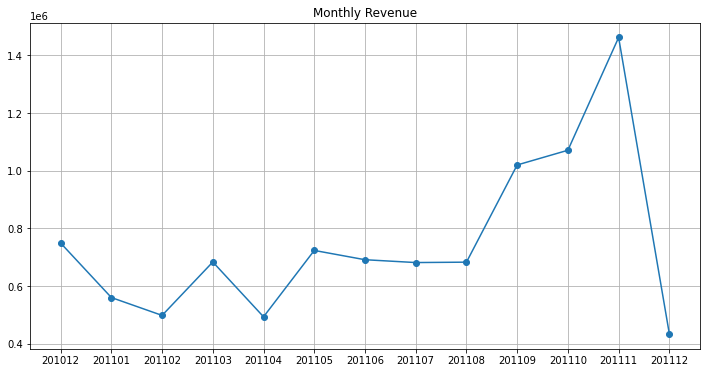

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(tx_revenue['InvoiceYearMonth'].to_numpy(dtype=str), tx_revenue['Revenue'].to_numpy(), marker='o')

plt.title('Monthly Revenue')
plt.grid()
plt.show()

In [32]:
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()
tx_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


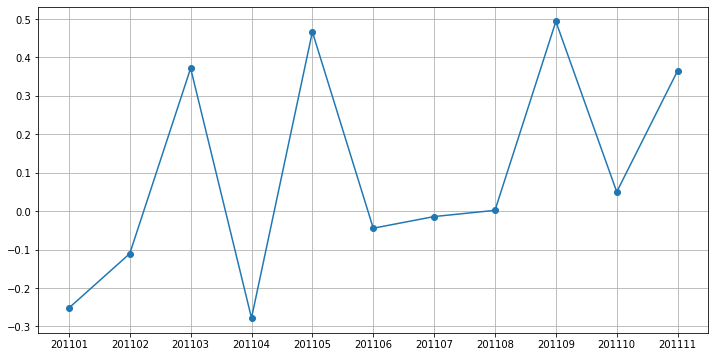

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(
    tx_revenue.query('InvoiceYearMonth < 201112')['InvoiceYearMonth'].to_numpy(dtype=str),
    tx_revenue.query('InvoiceYearMonth < 201112')['MonthlyGrowth'].to_numpy(),
    marker='o')
plt.grid()
plt.show()

In [37]:
tx_uk = data.query("Country=='United Kingdom'").reset_index(drop=True)
tx_uk_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
tx_uk_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


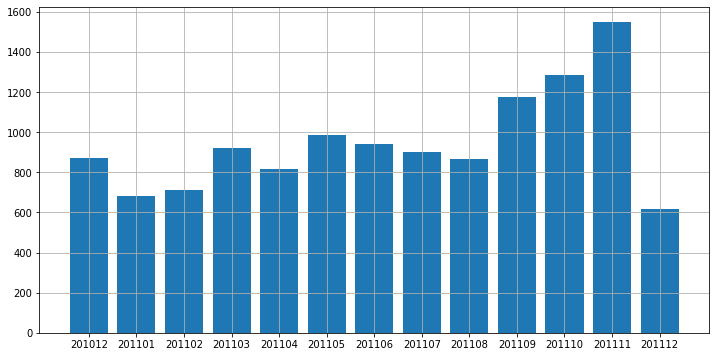

In [46]:
plt.figure(figsize=(12, 6))
plt.bar(
    tx_uk_monthly_active['InvoiceYearMonth'].to_numpy(dtype=str),
    tx_uk_monthly_active['CustomerID'].to_numpy()
)

plt.grid()
plt.show()

In [42]:
tx_uk_monthly_sales = tx_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
tx_uk_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


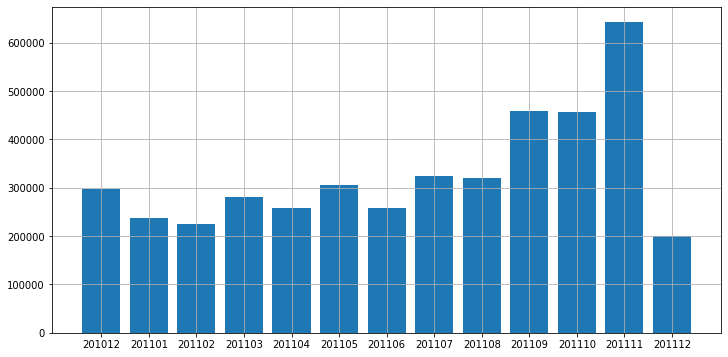

In [45]:
plt.figure(figsize=(12, 6))
plt.bar(
    tx_uk_monthly_sales['InvoiceYearMonth'].to_numpy(dtype=str),
    tx_uk_monthly_sales['Quantity'].to_numpy()
)

plt.grid()
plt.show()

In [47]:
tx_uk_monthly_order_avg = tx_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
tx_uk_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


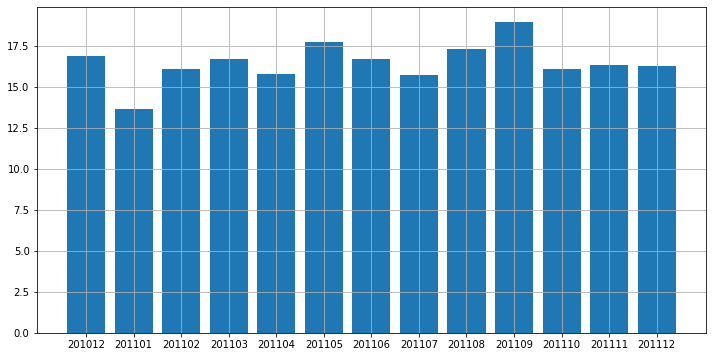

In [48]:
plt.figure(figsize=(12, 6))
plt.bar(
    tx_uk_monthly_order_avg['InvoiceYearMonth'].to_numpy(dtype=str),
    tx_uk_monthly_order_avg['Revenue'].to_numpy()
)

plt.grid()
plt.show()